In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [2]:
crime_2014 = os.path.join("../Resources/Clean/crime_2014_clean.csv")
crime_2016 = os.path.join("../Resources/Clean/crime_2016_clean.csv")

crime_2014_df = pd.read_csv(crime_2014)
crime_2016_df = pd.read_csv(crime_2016)

In [3]:
crime_2014_df = crime_2014_df.drop(columns="Unnamed: 0")
crime_2016_df = crime_2016_df.drop(columns="Unnamed: 0")

In [4]:
crime_2014_df.head()

,Zip Code,GO Highest Offense Desc,UCR Description
0,"78,753",AGG ROBBERY/DEADLY WEAPON,Robbery
1,"78,723",ROBBERY BY ASSAULT,Robbery
2,"78,702",ROBBERY BY THREAT,Robbery
3,"78,723",AGG ROBBERY/DEADLY WEAPON,Robbery
4,"78,702",AGG ROBBERY/DEADLY WEAPON,Robbery


In [5]:
# Order By Zip Code & make the Zip Code Column a str and remove the comma

zip_crime_2014 = crime_2014_df.groupby(["Zip Code","UCR Description"])["GO Highest Offense Desc"].count().reset_index()
zip_crime_2014["Zip Code"] = zip_crime_2014["Zip Code"].astype(str)
zip_crime_2014["Zip Code"] = zip_crime_2014["Zip Code"].str.replace(",","")
zip_crime_2014= zip_crime_2014.rename(columns={"GO Highest Offense Desc":"Count of Offenses"})
zip_crime_2014.head()

,Zip Code,UCR Description,Count of Offenses
0,78613,Agg Assault,2
1,78613,Auto Theft,4
2,78613,Burglary,3
3,78613,Robbery,2
4,78613,Theft,393


In [6]:
# Order By Zip Code & make the Zip Code Column a str 

zip_crime_2016 = crime_2016_df.groupby(["Zip Code","UCR Description"])["GO Highest Offense Desc"].count().reset_index()
zip_crime_2016["Zip Code"] = zip_crime_2016["Zip Code"].astype(int).astype(str)
zip_crime_2016= zip_crime_2016.rename(columns={"GO Highest Offense Desc":"Count of Offenses"})
zip_crime_2016.head()

,Zip Code,UCR Description,Count of Offenses
0,78613,Auto Theft,12
1,78613,Burglary,8
2,78613,Murder,1
3,78613,Rape,3
4,78613,Robbery,2


### Get an Overview of Offenses Per Zipcode Between the Two Years

In [7]:
# Aggregate to only zipcode

sum14 = pd.DataFrame(zip_crime_2014.groupby("Zip Code")["Count of Offenses"].sum().sort_values(ascending=False).reset_index())

sum16 = pd.DataFrame(zip_crime_2016.groupby("Zip Code")["Count of Offenses"].sum().sort_values(ascending=False).reset_index())

# Create DF and Change between the two years
summed = sum14.merge(sum16, on="Zip Code", suffixes= ("_14","_16"))
summed["Delta"] = summed["Count of Offenses_16"].subtract(other=summed["Count of Offenses_14"])

# Add Percentage Change Column
summed["Percentage"] = summed["Delta"].divide(other=summed["Count of Offenses_14"]).apply(lambda x: round(x,2))

### Because of graphing limitations, choose a small sample of zip codes

In [8]:
zips = ["78744","78721","78741","78747","78702","78753","78731","78752","78758","78723","78751","78726","78759","78703","78735","78756","78730","78701","78748","78705"]
crime_2014_bar = pd.DataFrame()

for zipcode in zips:
    zipped = zip_crime_2014[zip_crime_2014["Zip Code"]==zipcode]
    crime_2014_bar = pd.concat([crime_2014_bar, zipped])

crime_2014_bar= crime_2014_bar.pivot(index="Zip Code",columns="UCR Description")["Count of Offenses"]

In [9]:
# Same but for 2016
zips = ["78744","78721","78741","78747","78702","78753","78731","78752","78758","78723","78751","78726","78759","78703","78735","78756","78730","78701","78748","78705"]
crime_2016_bar = pd.DataFrame()

for zipcode in zips:
    zipped = zip_crime_2016[zip_crime_2016["Zip Code"]==zipcode]
    crime_2016_bar = pd.concat([crime_2016_bar, zipped])

crime_2016_bar= crime_2016_bar.pivot(index="Zip Code",columns="UCR Description")["Count of Offenses"]

#### Filter the summed data for 10 Zipcodes for better presentation

In [11]:
zips = ["78744","78721","78741","78747","78702","78753","78731","78752","78758","78723","78751","78726","78759","78703","78735","78756","78730","78701","78748","78705"]
summedbyzip = pd.DataFrame()
for zipcode in zips:
    zipped = summed[summed["Zip Code"]==zipcode]
    summedbyzip = pd.concat([summedbyzip, zipped])

In [12]:
summedbyzip.sort_values(by="Percentage")

,Zip Code,Count of Offenses_14,Count of Offenses_16,Delta,Percentage
5,78702,2196,1582,-614,-0.28
9,78759,1557,1198,-359,-0.23
0,78753,3935,3134,-801,-0.20
18,78721,639,515,-124,-0.19
2,78758,2826,2499,-327,-0.12
10,78748,1550,1372,-178,-0.11
38,78730,51,46,-5,-0.10
6,78744,2195,1990,-205,-0.09
31,78747,249,229,-20,-0.08
26,78756,355,326,-29,-0.08


In [13]:
summed.to_csv("../Outputs/summed.csv")

### Plotting a Stacked Bar Chart

In [14]:
# zip_crime_2016["UCR Description"].unique()
zip_crime_2014["UCR Description"].unique()

array(['Agg Assault', 'Auto Theft', 'Burglary', 'Robbery', 'Theft',
       'Rape', 'Murder'], dtype=object)

In [15]:
offenses = ['Auto Theft', 'Burglary', 'Murder', 'Rape', 'Robbery', 'Theft',
       'Agg Assault']

#### Sort the bar chart data by Count of Offenses

In [24]:
crime_2014_bar = crime_2014_bar.sort_values(by="Theft", ascending=False)
crime_2016_bar = crime_2016_bar.sort_values(by="Theft", ascending=False)

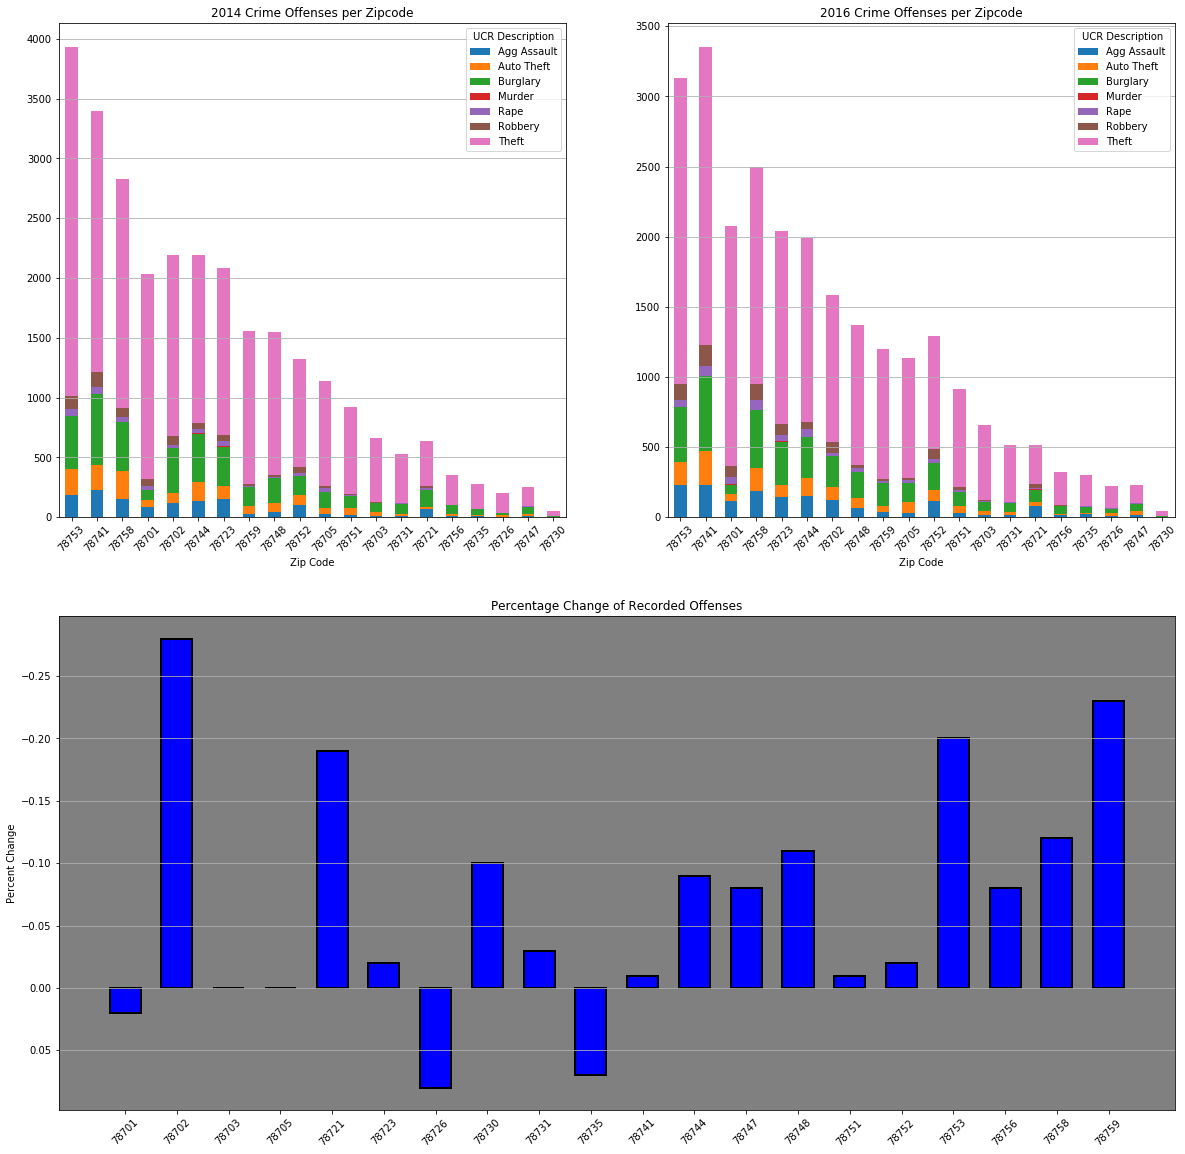

In [26]:
plt.figure(figsize=(20,20))

# First figure
ax1 = plt.subplot(2,2,1)

crime_2014_bar.plot.bar(stacked=True,ax=ax1)
plt.title("2014 Crime Offenses per Zipcode")
plt.xticks(rotation=45)
ax1.yaxis.grid()
# ax1.set_facecolor("grey")

# Second figure
ax2 = plt.subplot(2,2,2)

crime_2016_bar.plot.bar(stacked=True,ax=ax2)
plt.title("2016 Crime Offenses per Zipcode")
plt.xticks(rotation=45)
ax2.yaxis.grid()
# ax2.set_facecolor("grey")

# Third figure
ax3 = plt.subplot2grid((2,2), (1,0), colspan=2)
plt.title("Percentage Change of Recorded Offenses")
plt.ylabel("Percent Change")
ax3.bar(summedbyzip["Zip Code"], summedbyzip["Percentage"], width=0.6,color="blue",edgecolor="black",linewidth=2)
plt.xticks(rotation=45)
ax3.yaxis.grid()
ax3.set_facecolor("grey")
ax3.invert_yaxis()
plt.savefig("../Outputs/Crime_Graph.png", frameon=False)
plt.show()